# Fake News Detector
### Index
1. Importing Libraries
2. Reading csv file
3. Inserting the status column
4. merging the columns
5. Cleaning data
6. Train test split
7. Applying ML models
8. choices the champion model


# *Importing Libraries*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
fake_df= pd.read_csv('Fake.csv')
true_df=pd.read_csv('True.csv')

In [ ]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# I ll add column name "Class" in fake with 0, in True with 1

In [ ]:
true_df['Class']= 1
fake_df['Class']= 0


In [ ]:
print (f"data frame shape for the True is :{true_df.shape} ")
print (f"data frame shape for the Fake is :{fake_df.shape} ")



data frame shape for the True is :(21417, 5) 
data frame shape for the Fake is :(23481, 5) 


In [ ]:
# merge data together

df_merg= pd.concat([true_df,fake_df] , axis=0)
df_merg.sample(10)

,title,text,subject,date,Class
14647,"THEY KNEW! Federal Government Knew Flint, MI W...",This story is for anyone who believes the gove...,politics,"Jan 15, 2016",0
14864,Hillary’s Latest Ad Pushes Muslim Agenda Of Su...,So the irony isn t lost on me when I saw the s...,politics,"Nov 30, 2015",0
11422,KELLYANNE CONWAY Tells “Haters” Reason She Loo...,Kellyanne Conway responded to a New York Times...,politics,"Mar 13, 2017",0
18,SNL Hilariously Mocks Accused Child Molester ...,"Right now, the whole world is looking at the s...",News,"December 17, 2017",0
20235,Trump likely to visit China during November As...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 12, 2017",1
11151,EPA actions in Flint water crisis to be examin...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"January 21, 2016",1
14367,"OBAMA GIVES ILLEGAL ALIENS IN FLINT, MI Amnest...",Because people who scale border walls and brea...,politics,"Mar 4, 2016",0
8388,Biden: Nord Stream 2 pipeline is a 'bad deal' ...,STOCKHOLM (Reuters) - U.S. Vice President Joe ...,politicsNews,"August 25, 2016",1
15025,The Nerve! Clinton Claims The VA Scandal Was N...,Hillary Clinton has some nerve claiming that t...,politics,"Oct 26, 2015",0
5227,Trump Trolls Caught In The Act Of Spewing IDE...,If you ve recently gotten into an online polit...,News,"August 1, 2016",0


### Ok we now have dataframe contain both True and fake now we going to make some preprocessing on the data

In [ ]:
df_merg.columns

Index(['title', 'text', 'subject', 'date', 'Class'], dtype='object')

In [ ]:
df =df_merg.drop(['title','subject','date'], axis= 1)

In [ ]:
df.head()

,text,Class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
# shuffles all the rows in the DataFrame and returns them in a random order
df = df.sample(frac = 1)
df.head()

,text,Class
10948,(Reuters) - U.S. Republican presidential candi...,1
13620,Isn t this just the height of hypocrisy? Hilla...,0
18077,LONDON (Reuters) - Lawmakers in British Prime ...,1
13089,GENEVA (Reuters) - The U.N. Human Rights Counc...,1
10294,"Yes, this will happen! America needs a wall at...",0


In [ ]:
df.isnull().sum()

text     0
Class    0
dtype: int64

In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.head(3)

,text,Class
0,(Reuters) - U.S. Republican presidential candi...,1
1,Isn t this just the height of hypocrisy? Hilla...,0
2,LONDON (Reuters) - Lawmakers in British Prime ...,1


In [ ]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [ ]:
df["text"] = df["text"].apply(wp)

In [ ]:
# split the data to X and Y
X=df['text']
y=df['Class']

Spliting the data


In [ ]:
 X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

Convert text to vectors


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)


# Models i ll apply in this dataset
1. Logistic Regression.
2. random forest.
3. Decision Trees

# 1. Logistic Regression.


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [ ]:
pred_LR= LR.predict(xv_test)
acc_LR=LR.score(xv_test,y_test)
print (f"Accuracy of the Logisitic Regression  is:  {LR.score(xv_test, y_test)*100} %")


Accuracy of the Logisitic Regression  is:  98.74164810690424 %


In [ ]:
print (classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4712
           1       0.99      0.99      0.99      4268

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_RF= RF.predict(xv_test)
acc_RF=RF.score(xv_test,y_test)
print (f"Accuracy of the Random Forest Classifier is:  {RF.score(xv_test, y_test)*100} %")

Accuracy of the Random Forest Classifier is:  99.17594654788418 %


0.9917594654788419

In [ ]:
print (classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4712
           1       0.99      0.99      0.99      4268

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# 3. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier ()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_DT=DT.predict(xv_test)
acc_DT=DT.score(xv_test,y_test)
print (f"Accuracy of the Decision Tree Classifier is:  {DT.score(xv_test,y_test)*100} %")


Accuracy of the Decision Tree Classifier is:  99.61024498886414 %


In [ ]:
print (classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4712
           1       1.00      1.00      1.00      4268

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# 4. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier()
GBC.fit(xv_train, y_train)


GradientBoostingClassifier()

In [ ]:
pred_GBC=GBC.predict(xv_test)
acc_GBC=GBC.score(xv_test,y_test)
print (f"Accuracy of the Gradient Boosting Classifier is:  {GBC.score(xv_test,y_test)*100} %")


Accuracy of the Gradient Boosting Classifier is:  99.55456570155901 %


In [ ]:
print (classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4712
           1       0.99      1.00      1.00      4268

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
# Create an empty DataFrame
model_results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Add model results to the DataFrame
model_results = model_results.append({'Model': 'Decision Tree', 'Accuracy':acc_DT*100  }, ignore_index=True)
model_results = model_results.append({'Model': 'Random Foresst Regression', 'Accuracy':acc_RF*100  }, ignore_index=True)
model_results = model_results.append({'Model': 'Gradient Boosting Regressor', 'Accuracy':acc_GBC*100  }, ignore_index=True)
model_results = model_results.append({'Model': 'Logistic Regression', 'Accuracy':acc_LR*100  }, ignore_index=True)

<ipython-input-54-7e3585d02670>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Decision Tree', 'Accuracy':acc_DT*100  }, ignore_index=True)
<ipython-input-54-7e3585d02670>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Random Foresst Regression', 'Accuracy':acc_RF*100  }, ignore_index=True)
<ipython-input-54-7e3585d02670>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Gradient Boosting Regressor', 'Accuracy':acc_GBC*100  }, ignore_index=True)
<ipython-input-54-7e3585d02670>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [ ]:
model_results_sorted = model_results.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
model_results_sorted.head(6)


,Model,Accuracy
0,Decision Tree,99.610245
2,Gradient Boosting Regressor,99.554566
1,Random Foresst Regression,99.175947
3,Logistic Regression,98.741648


<Axes: ylabel='Class'>

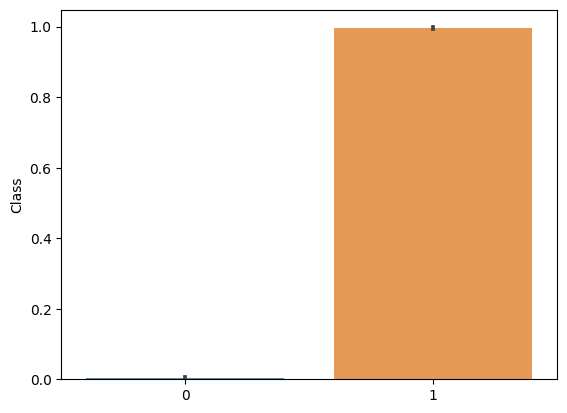

In [ ]:
sns.barplot(x=pred_DT, y=y_test, alpha=0.8)


# The Champion model is Decision Tree with accuracy = 99.61 %
## so I'll deploy Decision tree to know if this new is fake or True  